#### Customer Expenditure Prediction

Aim of the project is to predict Yearly amount spent on the basis of various variables like Avg. Session Length,Time on App,Time on Website and Length of Membership

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
ecommerce_customers= pd.read_csv('Ecommerce Customers.csv')
ecommerce_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
ecommerce_customers.shape

(500, 8)

In [4]:
#printing the summary of the dataset
ecommerce_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


We can see that there are no null values in the dataset

### Data exploration

Univariate Analysis

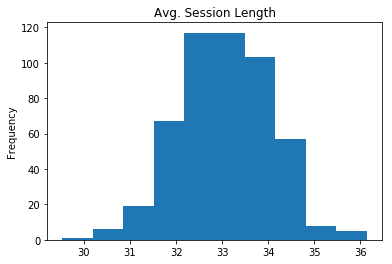

In [5]:
ecommerce_customers['Avg. Session Length'].plot(kind = 'hist', title='Avg. Session Length')
plt.show()

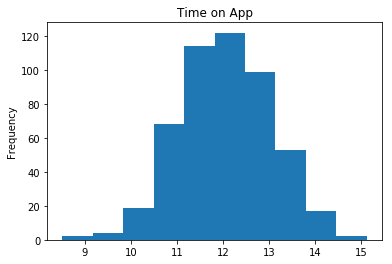

In [6]:
ecommerce_customers['Time on App'].plot(kind = 'hist', title='Time on App')
plt.show()

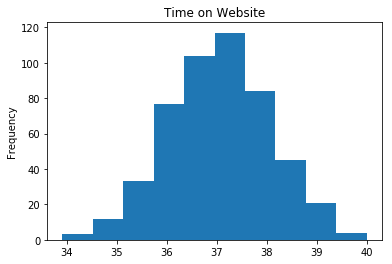

In [7]:
ecommerce_customers['Time on Website'].plot(kind = 'hist', title='Time on Website')
plt.show()

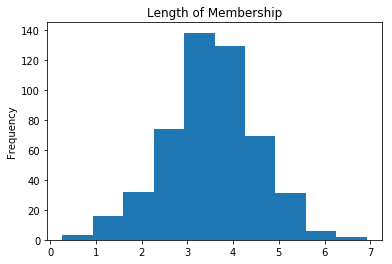

In [8]:
ecommerce_customers['Length of Membership'].plot(kind = 'hist', title='Length of Membership')
plt.show()

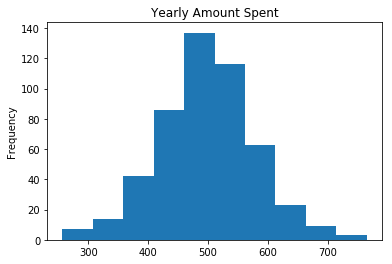

In [9]:
ecommerce_customers['Yearly Amount Spent'].plot(kind = 'hist', title='Yearly Amount Spent')
plt.show()

### Multivariate analysis

Evaluating relationships between different variables

In [10]:
import seaborn as sns

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


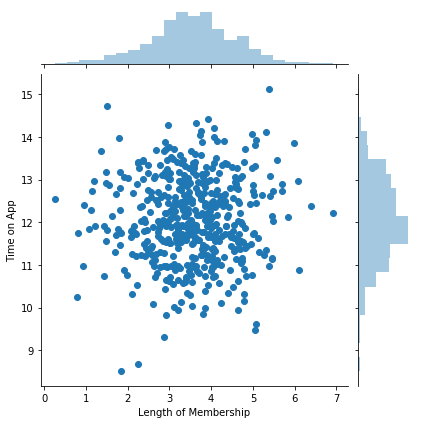

In [11]:
sns.jointplot(data=ecommerce_customers,x='Length of Membership', y='Time on App',kind='scatter')
plt.show()

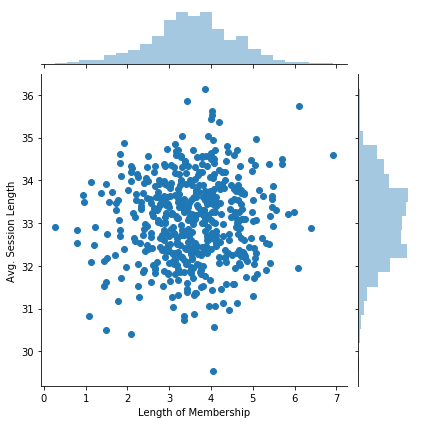

In [12]:
sns.jointplot(data=ecommerce_customers,x='Length of Membership', y='Avg. Session Length',kind='scatter')
plt.show()

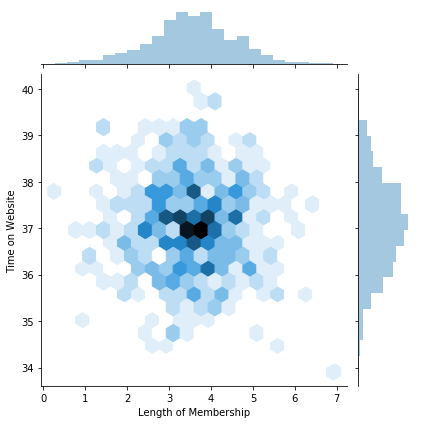

In [13]:
sns.jointplot(data=ecommerce_customers,x='Length of Membership', y='Time on Website',kind='hex')
plt.show()

Similarly evaluating relationships between all the variables

In [14]:
ecommerce_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


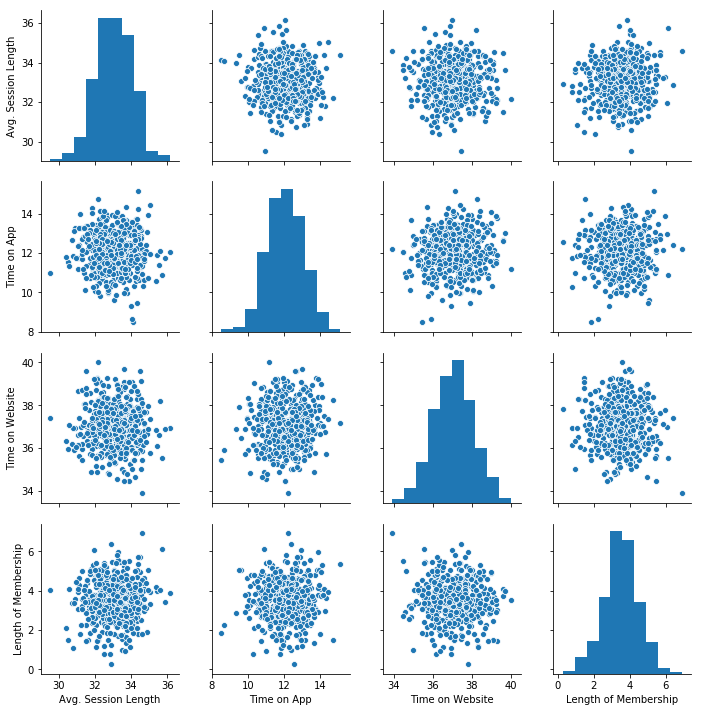

In [15]:
sns.pairplot(ecommerce_customers.iloc[:,3:7])
plt.show()

Plotting correlation between different variables of Ecommerce customers dataset

In [16]:
#Evalauting corelation between variables
ecommerce_customers1=ecommerce_customers.iloc[:,3:7]
corr_ecommerce=ecommerce_customers1.corr()

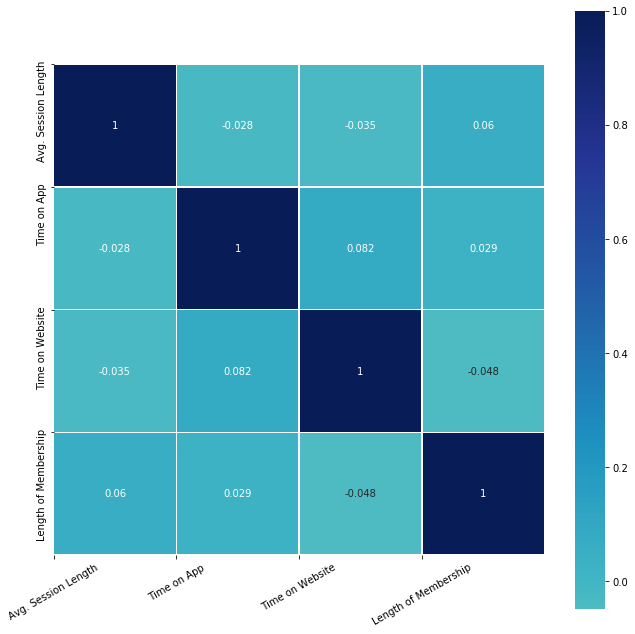

In [17]:
#Set up the matplotlib figure
f,ax= plt.subplots(figsize=(11,11))
#Generating a custom diverging colormap
cmap =sns.diverging_palette(220,10, as_cmap=True)
#Drawing the heatmap
sns.heatmap(corr_ecommerce,cmap='YlGnBu',vmax=1,annot= True,center=0,square=True,linewidths=.5)
#Apply xticks
plt.xticks(range(len(corr_ecommerce.columns)), corr_ecommerce.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr_ecommerce.columns)), corr_ecommerce.columns)
plt.show()

It can be seen that there is not any correlation between different variables

### Plotting univariate distributions - Histogram and Kernel Density Estimate

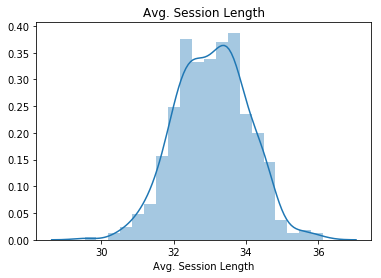

In [18]:
sns.distplot(ecommerce_customers['Avg. Session Length']).set_title('Avg. Session Length')
plt.show()

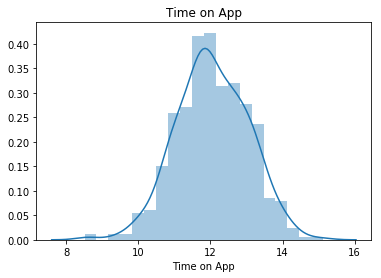

In [19]:
sns.distplot(ecommerce_customers['Time on App']).set_title('Time on App')
plt.show()

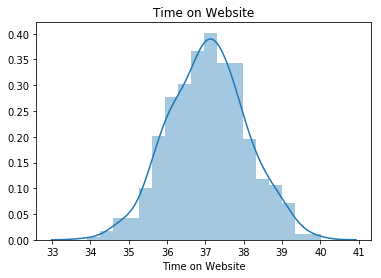

In [20]:
sns.distplot(ecommerce_customers['Time on Website']).set_title('Time on Website')
plt.show()

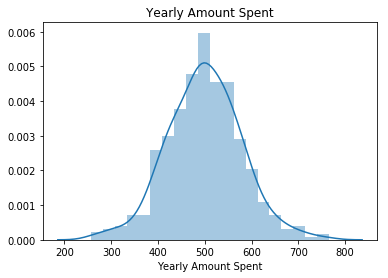

In [21]:
sns.distplot(ecommerce_customers['Yearly Amount Spent']).set_title('Yearly Amount Spent')
plt.show()

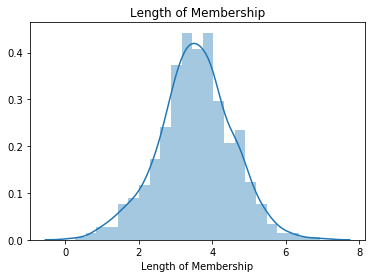

In [22]:
sns.distplot(ecommerce_customers['Length of Membership']).set_title('Length of Membership')
plt.show()

### Multiple Linear Regression

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
#Splitting the dataset into train and test split 
x= ecommerce_customers.iloc[:,3:7]
y= ecommerce_customers.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# Building the multiple lineaer regression model
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
# Summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                         22:16:01   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1044.2574     24.890    -41.954      0.000   -1093.192    -995.323
Avg. Session Length     25.5963      0.500     51.212      0.000      24.614      26.579
Time on App             38.7853      0.496     78.180      0.000      37.810      39.761
Time on Website          0.3104      0.487      0.638      0.524      -0.646       1.267
Length of Membership    61.8968      0.481    128.620      0.000      60.951      62.843
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.248
Skew:                          -0.048   Prob(JB):                        0.884
Kurtosis:                       3.075   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since time on website has p value > 0.05, it implies it is statiscally insignificant, so it can be dropped

In [26]:
#Dropping time on website from the dataset
x.drop('Time on Website', inplace=True, axis=1)

In [27]:
#Verifying changes
x.head()

,Avg. Session Length,Time on App,Length of Membership
0,34.497268,12.655651,4.082621
1,31.926272,11.109461,2.664034
2,33.000915,11.330278,4.104543
3,34.305557,13.717514,3.120179
4,33.330673,12.795189,4.446308


In [28]:
#Splitting the new dataset into train and test split 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
#Buidling the multiple linear regression model for the new dataset
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
x_train1 = sm.add_constant(x_train1)
results1 = sm.OLS(y_train1, x_train1).fit()
#summary of the model
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     8915.
Date:                 Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                         23:28:53   Log-Likelihood:                -1480.3
No. Observations:                  400   AIC:                             2969.
Df Residuals:                      396   BIC:                             2985.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1033.1208     17.724    -58.290      0.000   -1067.965    -998.276
Avg. Session Length     25.5991      0.499     51.259      0.000      24.617      26.581
Time on App             38.8112      0.494     78.553      0.000      37.840      39.783
Length of Membership    61.8823      0.480    128.831      0.000      60.938      62.827
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.236
Skew:                          -0.050   Prob(JB):                        0.889
Kurtosis:                       3.065   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be seen that now the p value of all the variables is less tha 0.05. This implies our result is statistically signifcant. 

Now let create a plot between predicted and the acutal scores

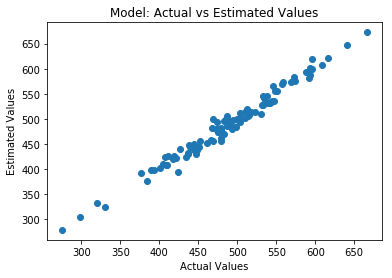

In [44]:
#evaluating the predicted values
x_test1= sm.add_constant(x_test1)
y_pred=results1.predict(x_test1)
# plotting the chart
plt.scatter(y_test1, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Model: Actual vs Estimated Values")
plt.show()


The above plot shows that the predicted and actual values are pretty close to each other. 

Lets look at the errors now

In [62]:
from sklearn import metrics
#Mean Absolute Error
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y_test1, y_pred))
#Mean Sqaured Error
print('Mean Squared Error(MSE):',mse(y_test1, y_pred))
#Root Mean Sqaured Error
print('Root Mean Squared Error(RMSE):',rmse(y_test1, y_pred))
#Mean Absolute Percentage Error
print('Root Absolute Percentage Error(MAPE):',rmse(y_test1, y_pred))


Mean Absolute Error(MAE): 8.58356484896458
Mean Squared Error(MSE): 110.32288587780535
Root Mean Squared Error(RMSE): 10.503470182649416
Root Absolute Percentage Error(MAPE): 10.503470182649416


Now in order to evaluate how good the model is, I will create another model with only two variables.In this case, I have chosen only Average Session Length and Time on App

In [52]:
#Splitting the dataset into train and test split 
x1= ecommerce_customers.iloc[:,3:5]
y1= ecommerce_customers.iloc[:,-1]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [55]:
#Buidling the multiple linear regression model for the new dataset
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
x1_train = sm.add_constant(x1_train)
results2 = sm.OLS(y1_train, x1_train).fit()
#summary of the model
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.374
Model:                             OLS   Adj. R-squared:                  0.371
Method:                  Least Squares   F-statistic:                     118.5
Date:                 Fri, 17 Jan 2020   Prob (F-statistic):           4.35e-41
Time:                         23:28:35   Log-Likelihood:                -2232.1
No. Observations:                  400   AIC:                             4470.
Df Residuals:                      397   BIC:                             4482.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -927.0004    115.833     -8.003      0.000   -1154.723    -699.278
Avg. Session Length    27.8558      3.265      8.531      0.000      21.436      34.275
Time on App            42.1344      3.228     13.052      0.000      35.788      48.481
==============================================================================
Omnibus:                        1.803   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.557
Skew:                          -0.115   Prob(JB):                        0.459
Kurtosis:                       3.201   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

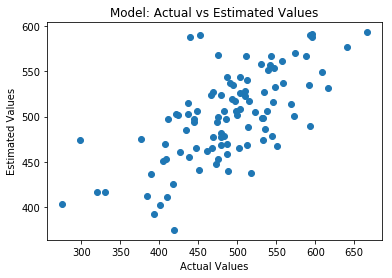

In [57]:
#evaluating the predicted values
x1_test= sm.add_constant(x1_test)
y1_pred=results2.predict(x1_test)
# plotting the chart
plt.scatter(y1_test, y1_pred)
plt.xlabel("Actual Values")
plt.ylabel("Estimated Values")
plt.title("Model: Actual vs Estimated Values")
plt.show()


In [63]:
#Evaluating the errors
#Mean Absolute Error
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y1_test, y1_pred))
#Mean Sqaured Error
print('Mean Squared Error(MSE):',mse(y1_test, y1_pred))
#Root Mean Sqaured Error
print('Root Mean Squared Error(RMSE):',rmse(y1_test, y1_pred))
#Mean Absolute Percentage Error
print('Root Absolute Percentage Error(MAPE):',rmse(y1_test, y1_pred))


Mean Absolute Error(MAE): 40.56066890469714
Mean Squared Error(MSE): 2872.2930575760242
Root Mean Squared Error(RMSE): 53.593778161051716
Root Absolute Percentage Error(MAPE): 53.593778161051716


Now by comparing both the models, it can be seen that in the new model, the adjusted R squared has dropped considerably from .985 to .374. Further, the plot between estimated and actual values show a lot of Bias. The errors of the new model are much higher than the older model. From this, it can be concluded that the earlier model was a much better predictor of yearly amount spent.

Hence, the model is:
### Yearly Amount Spent= -1033.1208+ 25.5991*(Avg. Session Length)+38.8112*(Time on App)+ 61.8823*(Length of Membership)

### Random Forest Regressor

In [65]:
#Training and testing the data
x2= ecommerce_customers.iloc[:,3:7]
y2= ecommerce_customers.iloc[:,-1]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [70]:
#Fitting Random Forest Regressor to the dataset
#import the regressor
from sklearn.ensemble import RandomForestRegressor
#create regressor object
regressor= RandomForestRegressor(n_estimators=100)
#fitting the x1_train and y1_train data
regressor.fit(x2_train,y2_train)
y_pred2 = regressor.predict(x2_test)

In [73]:
#Evaluating the errors
#Mean Absolute Error
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y2_test, y_pred2))
#Mean Sqaured Error
print('Mean Squared Error(MSE):',mse(y2_test, y_pred2))
#Root Mean Sqaured Error
print('Root Mean Squared Error(RMSE):',rmse(y2_test, y_pred2))
#Mean Absolute Percentage Error
print('Root Absolute Percentage Error(MAPE):',rmse(y2_test, y_pred2))
#R^2 Error
print('R^2 (coefficient of determination):',r2_score(y2_test, y_pred2))

Mean Absolute Error(MAE): 13.418036508766061
Mean Squared Error(MSE): 320.13991574539614
Root Mean Squared Error(RMSE): 17.892454156582215
Root Absolute Percentage Error(MAPE): 17.892454156582215
R^2 (coefficient of determination): 0.9353478764567497


It can be seen that the values of error as compared to the multiple linear regression model are high 

In [74]:
#Since, we have earlier dropped 'time on website' from the dataset, we will do the same here as well
x2.drop('Time on Website', inplace=True, axis=1)

In [75]:
##Training and testing the new dataset
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [76]:
#Fitting Random Forest Regressor to the dataset
#import the regressor
from sklearn.ensemble import RandomForestRegressor
#create regressor object
regressor= RandomForestRegressor(n_estimators=100)
#fitting the x1_train and y1_train data
regressor.fit(x2_train,y2_train)
y_pred2 = regressor.predict(x2_test)

In [77]:
#Evaluating the errors
#Mean Absolute Error
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y2_test, y_pred2))
#Mean Sqaured Error
print('Mean Squared Error(MSE):',mse(y2_test, y_pred2))
#Root Mean Sqaured Error
print('Root Mean Squared Error(RMSE):',rmse(y2_test, y_pred2))
#Mean Absolute Percentage Error
print('Root Absolute Percentage Error(MAPE):',rmse(y2_test, y_pred2))
#R^2 Error
print('R^2 (coefficient of determination):',r2_score(y2_test, y_pred2))

Mean Absolute Error(MAE): 13.544209601843617
Mean Squared Error(MSE): 312.83541176197787
Root Mean Squared Error(RMSE): 17.687153862676094
Root Absolute Percentage Error(MAPE): 17.687153862676094
R^2 (coefficient of determination): 0.9368230180143357


It can be seen that there is slight difference in the model after removing the variable. It has low r square value compared to the multiple linear regression model as well as high value of errors.